<a href="https://colab.research.google.com/github/egypationgodbill/egypationgodbill/blob/main/Homework_3_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import math
import sklearn
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from scipy.special import logsumexp
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import random
from scipy.stats import multivariate_normal

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#a)
data = pd.read_csv("/content/drive/MyDrive/faithful.dat", delim_whitespace=True)

In [4]:
data.shape
np_data = np.array(data)

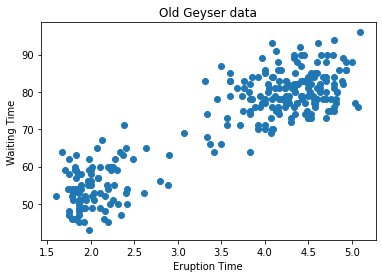

In [5]:
plt.title("Old Geyser data")
plt.xlabel("Eruption Time")
plt.ylabel("Waiting Time")
plt.scatter(np_data[:,0],np_data[:,1])
plt.show()

#plt.plot(np_data)

In [6]:
#b) copy the formula done?

In [7]:
#c) see the formula below

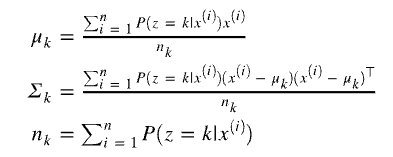

In [8]:
 #Bill EM implementation
 #used this source as reference: https://medium.com/@prateek.shubham.94/expectation-maximization-algorithm-7a4d1b65ca55

In [9]:
#e step, in the e step, we want to calculate the posterior probability p(z|xi) and loglikelihood
def Estep  (mu0, mu1, cov0, cov1, pz0):
  
  pz = [pz0, 1-pz0]
  
  pxz0 = multivariate_normal.pdf(np_data, mean = mu0, cov = cov0) # p(x|z = 0)
  pxz1 = multivariate_normal.pdf(np_data, mean = mu1, cov = cov1) # p(x|z = 1)

  px_z0 = pxz0 * pz0 # p(x,z=0)
  px_z1 = pxz1 * (1-pz0) # p(x,z=1)

  px_z = [px_z0, px_z1]

  pz0x = px_z0/(px_z0+px_z1)
  pz1x = 1 - pz0x

  pzx = [pz0x, pz1x] #p(z|x)

  logll = 0

  for k in range(2):
    for i in range (np_data.shape[0]):
      logll+= pzx[k][i] * np.log (px_z[k][i])

  return pzx, logll

In [10]:
# m step, where we need to recalculate the parameters with the formulas above

def Mstep (pzx):

  numer_mu0, numer_mu1, denum_mu0, denum_mu1 = 0, 0, 0, 0

  #calculate the new mus

  for i in range(np_data.shape[0]):

    numer_mu0    += pzx[0][i] * np_data[i] #p (z = 0|x^(i)) * x^(i)
    denum_mu0    += pzx[0][i] # n_0

    numer_mu1    += pzx[1][i] * np_data[i] #p (z = 1|x^(i)) * x^(i)
    denum_mu1  +=   pzx[1][i] # n_1

  mu0 = numer_mu0/denum_mu0
  mu1 = numer_mu1/denum_mu1

  num_cov0, num_cov1= 0,0

  for i in range (np_data.shape[0]):

    d1= np.matrix(np_data[i]- mu0)
    num_cov0 += pzx[0][i] * np.dot(d1.T,d1)

    d2=np.matrix(np_data[i]-mu1)
    num_cov1 += pzx[1][i] * np.dot(d2.T,d2)

  cov0 = num_cov0/denum_mu0
  cov1 = num_cov1/denum_mu1
  
  pz0 = denum_mu0 / np_data.shape[0]

  return mu0, mu1, cov0, cov1, pz0

number of iterations is: 67


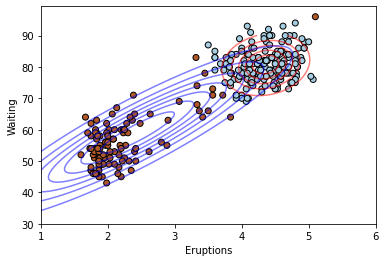

In [11]:
pastll = -1
currll = 4
lllist = []

#cov0= np.zeros((2,2))
#cov1 = cov0

mu0 = random.choice(np_data)
mu1 = random.choice(np_data)
cov0 = np.cov(np_data.T)   #initialize the covariance of the classes as the sample co-var matrix of the data
cov1 = cov0

pz0 = 0.01 #initial p(z=0) initial guess
n = 0
lmu0 = []
lmu1 = mu1
while abs(currll - pastll) >= 1e-9:
  
  pastll = currll
  pzx, currll = Estep(mu0, mu1, cov0, cov1, pz0)

  mu0, mu1,cov0, cuv1, pz0 = Mstep(pzx)
  n+=1

  lmu0 = np.append(lmu0, mu0)
  lmu1 = np.append(lmu1, mu1)

  lllist.append(currll)
params = [mu0, mu1, cov0, cov1, pz0]
#Idx, pyx = gda_predictions(np_data, params)
Idx = np.array(pzx).argmax(axis=0).flatten()
print("number of iterations is:", n)


x1 = np.linspace(1,6,200)
x2 = np.linspace(30,90,200)
X, Y = np.meshgrid (x1,x2)
pos = np.empty(X.shape + (2,))   
pos[:, :, 0] = X; pos[:, :, 1] = Y   

Z1 = multivariate_normal (mu0,cov0)
Z2 = multivariate_normal (mu1,cov1)
plt.scatter(np_data[:,0], np_data[:,1], c=Idx, edgecolors='k', cmap=plt.cm.Paired)
plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5) 
plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5) 
#plt.scatter(model.means_[:,0], model.means_[:,1], marker='D', c='r', s=100)
plt.xlabel('Eruptions')
plt.ylabel('Waiting')

plt.show() #EM clustering

Text(0.5, 0, 'iterations')

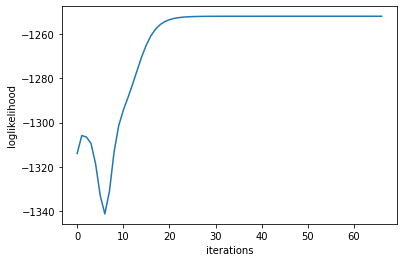

In [12]:
plt.plot(lllist)
plt.ylabel('loglikelihood')
plt.xlabel('iterations')

In [13]:
n = len(lmu0)/2
lmu0 = lmu0.reshape((int(n),2))

m = len(lmu1)/2
lmu1 = lmu1.reshape((int(m),2))

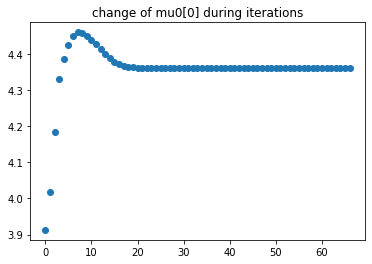

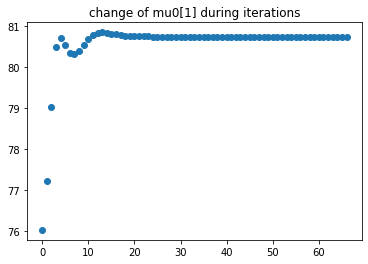

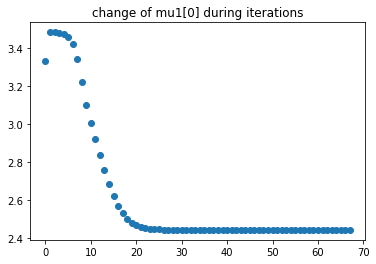

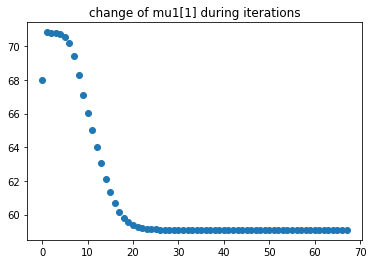

In [14]:
plt.scatter(range(lmu0.shape[0]), lmu0[:,:1])
plt.title ('change of mu0[0] during iterations')
plt.show()

plt.scatter(range(lmu0.shape[0]), lmu0[:,1:2])
plt.title ('change of mu0[1] during iterations')
plt.show()

plt.scatter(range(lmu1.shape[0]), lmu1[:,:1])
plt.title ('change of mu1[0] during iterations')
plt.show()

plt.scatter(range(lmu1.shape[0]), lmu1[:,1:2])
plt.title ('change of mu1[1] during iterations')
plt.show()

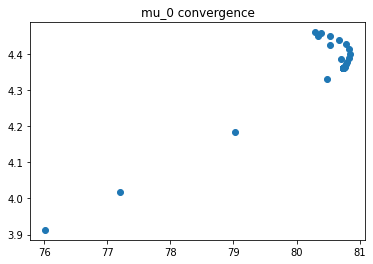

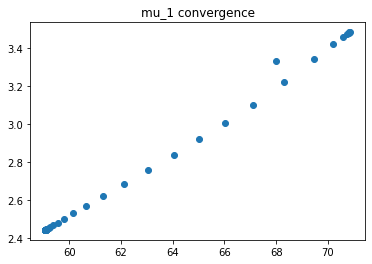

In [15]:
plt.scatter(lmu0[:,1:2], lmu0[:,:1])
plt.title ('mu_0 convergence')
plt.show()

plt.scatter(lmu1[:,1:2], lmu1[:,:1])
plt.title ('mu_1 convergence')
plt.show()

In [16]:
#e)
X= np.array(data)
print(X.shape)
#neigh = KNeighborsClassifier(n_neighbors=2)
neigh = KMeans(n_clusters= 2,random_state = 0).fit(X)

print(neigh)

#pred = neight.fit


(272, 2)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)


In [17]:
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
%matplotlib inline
from matplotlib.colors import LogNorm
plt.rcParams['figure.figsize'] = [12, 4]

x_min, x_max = np.min(X) - .5, np.max(X) + .5
y_min, y_max = np.min(Y) - .5, np.max(Y) + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .2), np.arange(y_min, y_max, .2))
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
print(Z)

[0 0 0 ... 1 1 1]


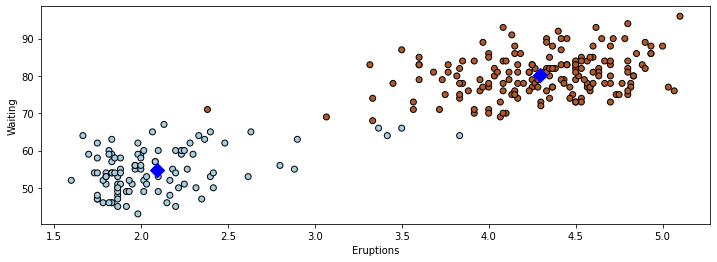

In [18]:
#Plot also the training points
plt.scatter(X[:,0], X[:,1], c=neigh.predict(X), edgecolors='k', cmap=plt.cm.Paired)
plt.scatter(neigh.cluster_centers_[:,0], neigh.cluster_centers_[:,1], marker='D', c='b',s=100)
#plt.scatter(model.means_[:,0], model.means_[:,1], marker='D', c='r', s=100)
plt.xlabel('Eruptions')
plt.ylabel('Waiting')

plt.show()